In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import urllib.request
import tarfile
from tensorflow.keras import layers,datasets,models 

In [2]:
#载入数据
(train_x,train_y),(test_x,test_y)=datasets.cifar10.load_data()


In [3]:
#显示数据集信息
print('training data shape:',train_x.shape)
print('training labels shape:',train_y.shape)
print('test data shape:',test_x.shape)
print('test label shape:',test_y.shape)

training data shape: (50000, 32, 32, 3)
training labels shape: (50000, 1)
test data shape: (10000, 32, 32, 3)
test label shape: (10000, 1)


In [4]:
train_x=train_x[0:10000,:,:,:]
train_y=train_y[0:10000,:]
test_x=test_x[-2000:,:,:,:]
test_y=test_y[-2000:,:]
print('training data shape:',train_x.shape)
print('training labels shape:',train_y.shape)
print('test data shape:',test_x.shape)
print('test label shape:',test_y.shape)

training data shape: (10000, 32, 32, 3)
training labels shape: (10000, 1)
test data shape: (2000, 32, 32, 3)
test label shape: (2000, 1)


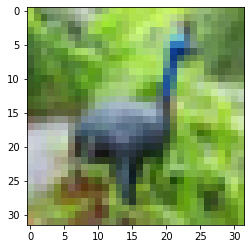

In [5]:
#查看单项image和label
#查看Xtrain第7张image
plt.imshow(train_x[6])

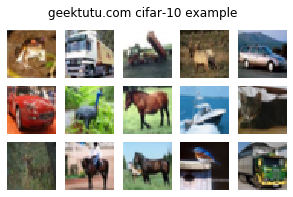

In [6]:
plt.figure(figsize=(5,3))
plt.subplots_adjust(hspace=0.1)
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(train_x[i])
    plt.axis('off')
_ = plt.suptitle("geektutu.com cifar-10 example")

In [7]:
#将图像进行数字标准化
train_x,test_x=train_x/255.0,test_x/255.0
#查看预处理后的图像数据信息
train_x[0][0][0]

array([0.23137255, 0.24313725, 0.24705882])

In [8]:
#查看标签数据
train_y[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [11]:
covn_base=tf.keras.applications.vgg16.VGG16(weights='imagenet',
                                               include_top=False,
                                               input_shape=(32,32,3),
                                               pooling='max')
covn_base.trainable=False

In [12]:
covn_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [13]:
model=tf.keras.Sequential()
model.add(covn_base)
model.add(layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6500      
Total params: 14,795,108
Trainable params: 80,420
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history=model.fit(train_x,train_y,epochs=5)

Epoch 1/5
10000/10000 [==============================] - 48s 5ms/sample - loss: 4.1330 - acc: 0.0778
Epoch 2/5
10000/10000 [==============================] - 49s 5ms/sample - loss: 3.3803 - acc: 0.1782
Epoch 3/5
10000/10000 [==============================] - 50s 5ms/sample - loss: 3.1030 - acc: 0.23353s - loss
Epoch 4/5
10000/10000 [==============================] - 48s 5ms/sample - loss: 2.9349 - acc: 0.2668
Epoch 5/5
10000/10000 [==============================] - 54s 5ms/sample - loss: 2.8045 - acc: 0.29573s - loss: 2


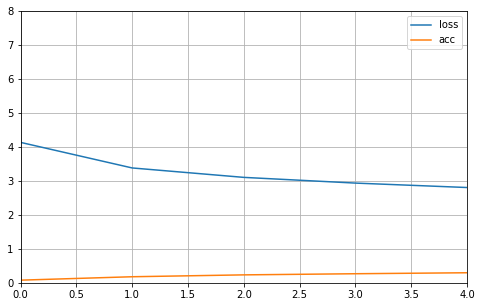

In [15]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,8)
    plt.show()
    
plot_learning_curves(history)

In [18]:
model.evaluate(test_x,test_y)

2000/2000 [==============================] - 10s 5ms/sample - loss: 3.0569 - acc: 0.2475


[3.0569053745269774, 0.2475]

In [22]:
fine_tune_at=-3
for layer in covn_base.layers[:fine_tune_at]:
    layer.trainable=False
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [23]:
history=model.fit(train_x,train_y,epochs=10)

Epoch 1/10
10000/10000 [==============================] - 49s 5ms/sample - loss: 2.5990 - acc: 0.3401
Epoch 2/10
10000/10000 [==============================] - 50s 5ms/sample - loss: 2.5667 - acc: 0.3476
Epoch 3/10
10000/10000 [==============================] - 49s 5ms/sample - loss: 2.5529 - acc: 0.34993s - loss: 
Epoch 4/10
10000/10000 [==============================] - 48s 5ms/sample - loss: 2.5401 - acc: 0.3522
Epoch 5/10
10000/10000 [==============================] - 50s 5ms/sample - loss: 2.5286 - acc: 0.3556
Epoch 6/10
10000/10000 [==============================] - 49s 5ms/sample - loss: 2.5168 - acc: 0.35860s - loss: 2.5151 - acc: 0.358 - ETA: 0s - loss: 2.5154 - acc: 0.
Epoch 7/10
10000/10000 [==============================] - 49s 5ms/sample - loss: 2.5057 - acc: 0.3617
Epoch 8/10
10000/10000 [==============================] - 49s 5ms/sample - loss: 2.4961 - acc: 0.3616
Epoch 9/10
10000/10000 [==============================] - 50s 5ms/sample - loss: 2.4864 - acc: 0.3630
Epoch 

In [24]:
model.evaluate(test_x,test_y)

2000/2000 [==============================] - 10s 5ms/sample - loss: 2.9467 - acc: 0.27403s - l


[2.946732837677002, 0.274]